In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize


In [2]:
df= pd.read_excel(r"C:\Users\adishree.b\Documents\walmart.xlsx")
df.head(2)

,Converge,Campaign Name,Media Buy Name,Creative Name,Creative Image,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,IO Start Date,IO End Date,Impressions,Clicks,Color,CTA,Product Shot / Product Portfolio,Lifestyle Imagery,Heavy Copy,Savings Messaging
0,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_DO_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,https://tpc.googlesyndication.com/pageadimg/im...,Demographic,160x600,NaN,NaN,2018-01-01,2018-02-28,202255.0,34.0,White,Shop Now,Product Portfolio,Yes,No,No
1,01_ABB_J9273,01_ABB_J9273_AbbottMommy,BT_ORGANIC_P3_01_ABB_J9273_AbbottMommy,01_ABB_J9273_AbbottMommy_DIS_B_160x600_SkyScpr...,https://tpc.googlesyndication.com/pageadimg/im...,Behavioral,160x600,NaN,NaN,2018-01-01,2018-02-28,176435.0,21.0,White,Shop Now,Product Portfolio,Yes,No,No


In [3]:
df=df.drop(['Converge', 'Campaign Name', 'Creative Image','Media Buy Name','Creative Name','IO Start Date','IO End Date','Color','CTA','Product Shot / Product Portfolio','Lifestyle Imagery','Heavy Copy','Savings Messaging'], axis=1)
df.head(2)

,Targeting Type,Creative Size,L1 Vertical,L2 Vertical,Impressions,Clicks
0,Demographic,160x600,NaN,NaN,202255.0,34.0
1,Behavioral,160x600,NaN,NaN,176435.0,21.0


In [4]:
df['L1 Vertical']= df['L1 Vertical'].fillna('Others')
df['L2 Vertical']= df['L2 Vertical'].fillna('Others')

In [5]:
variables = df[['Targeting Type','Creative Size','L1 Vertical', 'L2 Vertical']]
df_dum = pd.get_dummies(variables, drop_first=True)

In [6]:
df_dum.head(3)

,Targeting Type_Contextual,Targeting Type_Demographic,Targeting Type_Geographic,Targeting Type_Keyword/Search,Targeting Type_Lockout,Targeting Type_RunOfSite,Creative Size_728x90,Creative Size_Custom rendering,L1 Vertical_Automotive,L1 Vertical_Baby & Toddlers,...,L2 Vertical_Snacks,L2 Vertical_Software,L2 Vertical_Sports & Outdoor Recreation,L2 Vertical_TVs,L2 Vertical_Tires,L2 Vertical_Toys,L2 Vertical_Vehicles,L2 Vertical_Video Games,L2 Vertical_Weight Management,L2 Vertical_Wireless
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_dum[['Impressions','Clicks']] = df[['Impressions','Clicks']]

In [8]:
df_dum.dtypes

Targeting Type_Contextual          uint8
Targeting Type_Demographic         uint8
Targeting Type_Geographic          uint8
Targeting Type_Keyword/Search      uint8
Targeting Type_Lockout             uint8
                                  ...   
L2 Vertical_Video Games            uint8
L2 Vertical_Weight Management      uint8
L2 Vertical_Wireless               uint8
Impressions                      float64
Clicks                           float64
Length: 81, dtype: object

In [9]:
df_dum.dropna(inplace=True)
df_dum.isnull().sum()

Targeting Type_Contextual        0
Targeting Type_Demographic       0
Targeting Type_Geographic        0
Targeting Type_Keyword/Search    0
Targeting Type_Lockout           0
                                ..
L2 Vertical_Video Games          0
L2 Vertical_Weight Management    0
L2 Vertical_Wireless             0
Impressions                      0
Clicks                           0
Length: 81, dtype: int64

In [13]:
df_dum['CTR'] = (df_dum['Clicks']/df_dum['Impressions'])*100
df_dum.head()

,Targeting Type_Contextual,Targeting Type_Demographic,Targeting Type_Geographic,Targeting Type_Keyword/Search,Targeting Type_Lockout,Targeting Type_RunOfSite,Creative Size_728x90,Creative Size_Custom rendering,L1 Vertical_Automotive,L1 Vertical_Baby & Toddlers,...,L2 Vertical_TVs,L2 Vertical_Tires,L2 Vertical_Toys,L2 Vertical_Vehicles,L2 Vertical_Video Games,L2 Vertical_Weight Management,L2 Vertical_Wireless,Impressions,Clicks,CTR
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,202255.0,34.0,0.016810
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,176435.0,21.0,0.011902
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,86194.0,45.0,0.052208
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,60277.0,9.0,0.014931
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,156743.0,19.0,0.012122


In [10]:
df_dum = df_dum.astype(float)

In [14]:
df_dum['CTR']

0        0.016810
1        0.011902
2        0.052208
3        0.014931
4        0.012122
           ...   
12653    0.074607
12654    0.035568
12655    0.056007
12656    0.016235
12657    0.086281
Name: CTR, Length: 12650, dtype: float64

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
df_dum['CTR'].describe()

count    12650.000000
mean         0.058993
std          0.144379
min          0.000000
25%          0.009364
50%          0.027014
75%          0.064226
max          5.405405
Name: CTR, dtype: float64

In [17]:
dfx = df_dum[df_dum['CTR']==0]

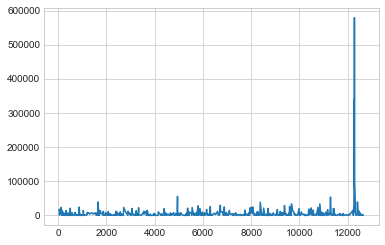

In [18]:
plt.plot(dfx['Impressions'])

In [ ]:
df_dum = df_dum[df_dum['CTR']>0]

In [ ]:
df_dum.describe()

In [19]:
q975 = df_dum['CTR'].quantile(.975)
q025  = df_dum['CTR'].quantile(.025)

In [20]:
q025

0.0

In [21]:
df1 = df_dum[df_dum['CTR']<q975]
df1.describe(include='all')

,Targeting Type_Contextual,Targeting Type_Demographic,Targeting Type_Geographic,Targeting Type_Keyword/Search,Targeting Type_Lockout,Targeting Type_RunOfSite,Creative Size_728x90,Creative Size_Custom rendering,L1 Vertical_Automotive,L1 Vertical_Baby & Toddlers,...,L2 Vertical_TVs,L2 Vertical_Tires,L2 Vertical_Toys,L2 Vertical_Vehicles,L2 Vertical_Video Games,L2 Vertical_Weight Management,L2 Vertical_Wireless,Impressions,Clicks,CTR
count,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,...,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,12333.000000,1.233300e+04,12333.000000,12333.000000
mean,0.304468,0.044677,0.005919,0.119598,0.001541,0.114408,0.000081,0.790643,0.019136,0.051812,...,0.014919,0.001216,0.019055,0.000243,0.042325,0.013054,0.070786,1.200418e+05,41.022703,0.044742
std,0.460200,0.206602,0.076711,0.324504,0.039222,0.318320,0.009005,0.406866,0.137007,0.221657,...,0.121235,0.034855,0.136722,0.015595,0.201339,0.113512,0.256477,3.554883e+05,139.291946,0.053778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.373000e+03,2.000000,0.008998
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.530900e+04,8.000000,0.025901
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.736100e+04,30.000000,0.059737
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.245660e+07,7229.000000,0.305499


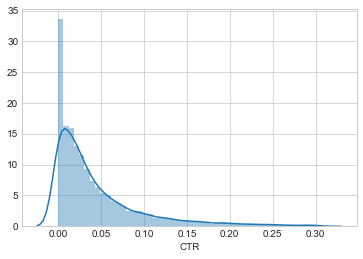

In [22]:
import seaborn as sns
sns.distplot(df1['CTR'])

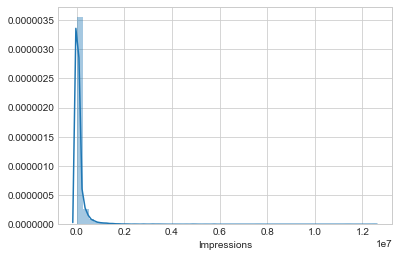

In [23]:
import seaborn as sns
sns.distplot(df1['Impressions'])

In [24]:
melb_target = df1['CTR']
new_target = df1['Impressions']
melb_predictors = df1.drop(['CTR','Clicks','Impressions'], axis=1)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(melb_predictors,melb_target,
                                                    train_size=0.75, 
                                                    test_size=0.25, 
                                                    random_state=1)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (9249, 79)
X_test : (3084, 79)
y_train : (9249,)
y_test : (3084,)


In [ ]:
#using linear regression

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_hat = reg.predict(X_train)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [26]:
# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
import matplotlib.pyplot as plt
import tensorflow as tf

In [27]:
generated_inputs = melb_predictors

generated_targets = melb_target

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [35]:
# Load the training data from the NPZ
training_data = np.load('TF_intro.npz')

In [36]:
training_data

In [37]:
generated_inputs.shape

(12333, 79)

In [38]:
input_size = 79
output_size = 1
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 79
    
# define how the model will look like
model = tf.keras.Sequential([
    
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, 
                          kernel_initializer=tf.random_uniform_initializer(minval=0, maxval=0.02),
                            bias_initializer=tf.random_uniform_initializer(minval=0, maxval=0.02)) # output layer
])

In [39]:
# 'compile' is the place where you select and indicate the optimizers and the loss
model.compile(optimizer='adam', loss='mean_squared_error')

# finally we fit the model, indicating the inputs and targets
# if they are not otherwise specified the number of epochs will be 1 (a single epoch of training), 
# so the number of epochs is 'kind of' mandatory, too
# we can play around with verbose; we prefer verbose=2
model.fit(training_data['inputs'], training_data['targets'], epochs=20, verbose=2)

TypeError: Unable to build `Dense` layer with non-floating point dtype <dtype: 'uint8'>

In [ ]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
weights = model.layers[0].get_weights()[0]
weights

In [ ]:

# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
bias = model.layers[0].get_weights()[1]
bias

In [ ]:
# We can predict new values in order to actually make use of the model
# Sometimes it is useful to round the values to be able to read the output
# Usually we use this method on NEW DATA, rather than our original training data
output_value = model.predict_on_batch(training_data['inputs'])

In [ ]:
# If we display our targets (actual observed values), we can manually compare the outputs and the targets
training_data['targets']

In [ ]:
mse = tf.reduce_mean(tf.square(output_value - training_data['targets']))

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
print(mse)

In [ ]:
rmse

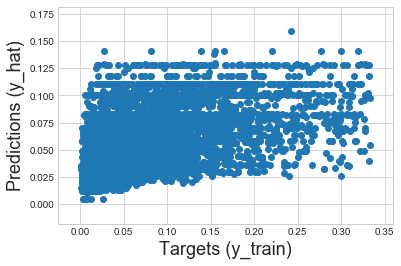

In [72]:
plt.scatter(training_data['targets'], output_value)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()